The main goal of this document will be to explore polynomial dynamical systems on the integers modulo $N$. That is, consider a polynomial $f(x)$, and view it as a dynamical system on $\mathbb{Z}/N\mathbb{Z}$ by iteratively applying it. What can we say, for instance, about the resulting orbits?

In [1]:
import matplotlib.pyplot as plt
import math

The simplest polynomials that we can analyse are $f(x) = x + n$ for some integer constant $n$. It doesn't take much thought to understand its orbits modulo $N$. But now let's consider polynomials such as $f(x) = 2x$. What happens in that case?

In [2]:
def stable_orbit(f, N, x):
    """Given a (say polynomial) function f, a number N, and a starting value x, we iteratively apply x = f(x) mod N until we end up in a loop. We return that loop."""
    x = x % N
    values = [x]
    for _ in range(N):
        x = f(x) % N
        try:
            #If we find an x that has already been obtained previously, then we have obviously found the stable orbit.
            find = values.index(x)
            return values[find :: ]
        except ValueError:
            values.append(x)
    return []

In [3]:
def f(x):
    return 2*x

max_value = 1000
data = [len(stable_orbit(f, N, 1)) for N in range(1, max_value + 1)]

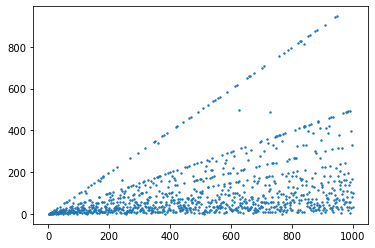

In [4]:
plt.scatter(range(1, max_value + 1), data, s = 2)
plt.show()

That's a pretty cool plot. One thing we see is that there are some obvious lines appearing in this graph. Indeed there are numerous $N$ for which the length of the stable orbit is equal to $N - 1$:

In [5]:
max_orbits = [i + 1 for i in range(max_value) if data[i] == i]
print(max_orbits)

[2, 3, 5, 11, 13, 19, 29, 37, 53, 59, 61, 67, 83, 101, 107, 131, 139, 149, 163, 173, 179, 181, 197, 211, 227, 269, 293, 317, 347, 349, 373, 379, 389, 419, 421, 443, 461, 467, 491, 509, 523, 541, 547, 557, 563, 587, 613, 619, 653, 659, 661, 677, 701, 709, 757, 773, 787, 797, 821, 827, 829, 853, 859, 877, 883, 907, 941, 947]


With the exception of $N = 2$, a number is in this list if and only if $N$ is prime and $2$ is a primitive root mod $N$. It is a famous conjecture of Artin that there are infinitely many such prime numbers. This conjecture is known to follow from the generalised Riemann hypothesis. With that in mind, it's safe to say that we know just as little about the lines with other slopes in the plot.

One additional thing that stands out is that there are some random values lying in between the line of slope $1$ and the line of slope $1/2$. These turn out to be prime powers. For instance, if $N = 625 = 5^4$, then we find the length of the stable period to be $500$, while if $N = 729 = 3^6$, then the length is $486$.

Now, what we can say about the number of stable orbits? That is, instead of starting at $0$, consider all starting values and look at their stable orbits.

In [6]:
def count_stable_orbits(f, N):
    """Count the number of stable orbits of the function x -> f(x) % N."""
    found_in_orbit = {x : False for x in range(N)} #We keep track of those numbers for which we already know what stable orbit it lands into. This avoids quite a bit of redundancy.
    count = 0
    for x in range(N):
        if not found_in_orbit[x]:
            values = [x]
            while True: 
                x = f(x) % N
                if found_in_orbit[x]:
                    break
                elif x in values:
                    for value in values:
                        found_in_orbit[value] = True
                    count += 1
                    break
                else:
                    values.append(x)
    return count

This is a much more data-intensive operation, since, at least in principle, we can have to consider every starting value. The code has been optimised to avoid redundancy as much as I can, but it remains painful.

In [7]:
max_value = 1000
data = [count_stable_orbits(f, N) for N in range(1, max_value + 1)]

First couple of values: [1, 1, 2, 1, 2, 2, 3, 1, 3, 2, 2, 2, 2, 3, 5, 1, 3, 3, 2, 2, 6]


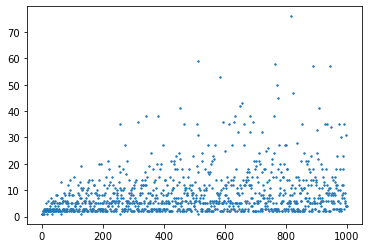

In [8]:
plt.scatter(range(1, max_value + 1), data, s = 2)
print("First couple of values:", data[:21])
plt.show()

The sequence can be found in OEIS as A000374. It's mentioned that it is equal to the number of irreducible factors in the factorization of the polynomial $x^N - 1$ over $\mathbb{F}_2$, which is pretty cool.

One thing worth noting is that we don't really need to make use of the mulitplicative structure of the integers modulo $N$ when defining this dynamical system. That is, instead of writing $x \mapsto 2x$, we can write $x \mapsto x + x$. It's tempting to ask how this system behaves over general monoids. Notably, when applied to the multiplicative units of $\mathbb{Z} / p\mathbb{Z}$, we would get the behaviour of the polynomial $f(x) = x^2$. In a separate file I will use GAP to investigate the behaviour of this system.

The observation above completely break down if instead we consider a system that somehow mixes up addition and multiplication. So let's consider a polynomial like $f(x) = x^2 + 1$, with starting value $0$, and let's just see where that gets us.

In [9]:
def f(x):
    return x**2 + 1

for N in range(1, 41):
    print(stable_orbit(f, N, 0))

[0]
[0, 1]
[2]
[1, 2]
[0, 1, 2]
[2, 5]
[5]
[2, 5]
[2, 5, 8]
[0, 1, 2, 5, 6, 7]
[4, 6]
[2, 5]
[0, 1, 2, 5]
[5, 12]
[2, 5, 11]
[5, 10]
[2, 5, 9, 14, 10, 16]
[2, 5, 8, 11, 14, 17]
[12]
[1, 2, 5, 6, 17, 10]
[5]
[4, 17]
[9, 13]
[2, 5]
[1, 2, 5]
[0, 1, 2, 5]
[2, 5, 26]
[5, 26]
[7, 21]
[2, 5, 26, 17, 20, 11]
[26]
[5, 26]
[26, 17]
[2, 5, 26, 31, 10, 33]
[5, 26, 12]
[2, 5, 26, 29, 14, 17]
[11]
[31, 12]
[2, 5, 26, 14]
[2, 5, 26, 37, 10, 21]


That seems elegantly chaotic! What happens when we just look at the lengths of the stable orbits?

In [10]:
max_value = 100000
data = [len(stable_orbit(f, N, 0)) for N in range(1, max_value + 1)]

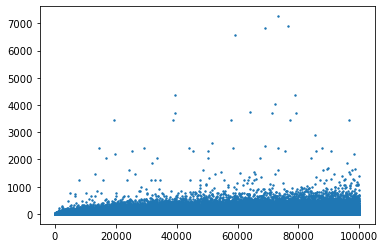

In [11]:
plt.scatter(range(1, max_value + 1), data, s = 2)
plt.show()

It may look a little better on a log-plot.

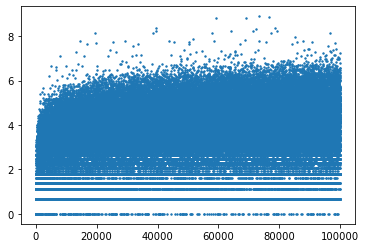

In [12]:
log_data = [math.log(n) for n in data]
plt.scatter(range(1, max_value + 1), log_data, s = 2)
plt.show()

I don't know what one can say about the growth of this function in general. Let's denote the function by $L(N)$. It's not hard to show that $L$ commutes with least common multiples, in that

$$ L(\operatorname{lcm}(M,N)) = \operatorname{lcm}(L(M), L(N)). $$

There doesn't seem to be any nontrivial lower bound, because even for large $N$, there seem to be many stable periods of length $1$. That this can happen is not too surprising; indeed, there are numerous solutions to the equation $x = x^2 + 1$ mod $N$ in general. Still, the infinitude of $N$ such that $L(N) = 1$ is not obvious to me, because it's not clear when exactly the orbit of $0$ will reach such a value.

What about an upper bound? Surely there should be something that we can say, right? For trivial reasons, we know that $L(N) \leq N$. How strong is this bound?

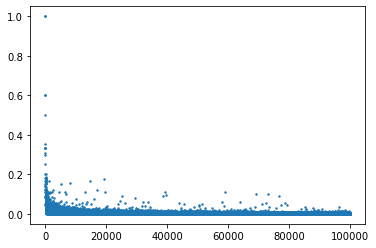

In [13]:
quotient_data = [data[n]/(n + 1) for n in range(max_value)]
plt.scatter(range(1, max_value + 1), quotient_data, s = 2)
plt.show()

I'm quite surprised at how 'close to sharp' this upper bound already is. Yes, most values of $L(N)$ are much less than $N$, but there are some obvious occasional outliers. Even at $N = 75\,000$ one finds values for which $L(N) / N$ is above $0.1$. 

What if we count the number of stable orbits in general? That is, instead of starting at $0$, consider all starting values and look at their stable orbits.

In [14]:
def count_stable_orbits(f, N):
    """Count the number of stable orbits of the function x -> f(x) % N."""
    found_in_orbit = {x : False for x in range(N)} #We keep track of those numbers for which we already know what stable orbit it lands into. This avoids quite a bit of redundancy.
    count = 0
    for x in range(N):
        if not found_in_orbit[x]:
            values = [x]
            while True: 
                x = f(x) % N
                if found_in_orbit[x]:
                    break
                elif x in values:
                    for value in values:
                        found_in_orbit[value] = True
                    count += 1
                    break
                else:
                    values.append(x)
    return count

This is a much more data-intensive operation, since, at least in principle, we can have to consider every starting value. The code has been optimised to avoid redundancy, but it is still rather slow. Since I plan to submit this sequence to the OEIS, I will upload a faster script written in C in the near future.

In [15]:
max_value = 1000
data = [count_stable_orbits(f, N) for N in range(1, max_value + 1)]

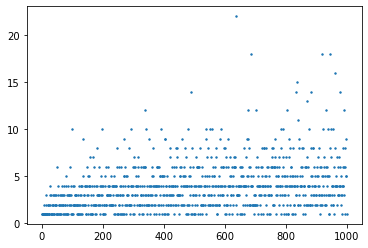

In [16]:
plt.scatter(range(1, max_value + 1), data, s = 2)
plt.show()

Can we say anything about the *sizes* of the various stable orbits?

In [17]:
def stable_orbit_sizes(f, N):
    """Count the siezs of the stable orbits of the function x -> f(x) % N."""
    found_in_orbit = {x : False for x in range(N)} #We keep track of those numbers for which we already know what stable orbit it lands into. This avoids quite a bit of redundancy.
    sizes = []
    for x in range(N):
        if not found_in_orbit[x]:
            values = [x]
            while True: 
                x = f(x) % N
                if found_in_orbit[x]:
                    break
                else:
                    try:
                        find = values.index(x)
                        sizes.append(len(values) - find)
                        for value in values:
                            found_in_orbit[value] = True
                        break
                    except ValueError:
                        values.append(x)
    return sizes

Let's take some random values in some arbitrary interval:

In [18]:
def f(x):
    return x**2 + 1

for N in range(20240, 20280):
    print("N =", N, ":", stable_orbit_sizes(f, N))

N = 20240 : [6, 6, 6, 6]
N = 20241 : [12, 12, 12, 12, 12, 12]
N = 20242 : [58, 58, 2, 2, 2, 2]
N = 20243 : [9, 9, 16, 9, 9, 9, 5, 15, 2, 3, 5, 3, 48, 3, 16, 3, 3, 6, 2]
N = 20244 : [26, 26, 8, 8, 2, 2, 8, 8, 2, 2]
N = 20245 : [54, 54, 54]
N = 20246 : [30, 30, 6, 6, 6, 6, 2, 6, 6, 2, 2, 2]
N = 20247 : [174, 6, 6]
N = 20248 : [14, 22, 22, 38, 6, 6, 2, 2, 4, 6, 4]
N = 20249 : [68, 17, 30, 24]
N = 20250 : [18, 18, 18, 18, 18, 18, 18, 18, 18]
N = 20251 : [26, 26, 26, 26, 4, 4, 4, 4, 2, 2, 2, 2]
N = 20252 : [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
N = 20253 : [1, 3, 6, 6, 1, 6, 6, 2, 1, 1, 6, 2, 3]
N = 20254 : [28, 14, 14, 28, 28, 28, 14, 14]
N = 20255 : [114, 12, 3, 3]
N = 20256 : [6, 6, 14, 2, 2, 2, 2, 10]
N = 20257 : [12, 6, 4, 6, 12, 4, 6, 6]
N = 20258 : [18, 30, 30, 30, 18, 30, 2, 2, 2, 2]
N = 20259 : [45, 45, 45, 3, 6, 12, 3]
N = 20260 : [102, 42, 30, 6, 6, 6, 30, 6, 6, 30, 12, 12, 6]
N = 20261 : [56, 51, 16, 5]
N = 20262 : [2, 2, 6, 6, 2, 6, 6, 2]
N = 20263 : [82, 18]
N = 2026

I find it incredible how much repetition occurs in the periods of the orbits, not to mention how many orbit lengths are scalar multiples of each other. It strongly suggests the presence of a certain symmetry governing the dynamical system. What might that symmetry be?